### **Aluna**: Lais de Souza Ziegler
# 🛳️ Predição de sobrevivência em Naufrágio
Dataset: treino.csv

O projeto de predição de sobrevivência em naufrágios utiliza um conjunto de dados inspirado em um incidente recente no Mediterrâneo, contendo informações sobre 7.124 passageiros a bordo de um navio. As variáveis incluem identificação única do passageiro, nome, informações da cabine (deck, número e posição), procedência, destino, idade, status de VIP, modalidade de hospedagem e gastos com serviços a bordo. O objetivo é prever a probabilidade de um passageiro sobreviver ao naufrágio com base em suas características.

### 1️⃣ Leitura e exploração dos dados
---
#### Importando as bibliotecas necessárias para a análise de dados

In [1132]:
# Pacotes básicos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Pacotes do Scikit-learn para acesso a datasets, preparação, modelagem e avaliação
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score, roc_curve, roc_auc_score, auc, RocCurveDisplay, precision_score
from sklearn.preprocessing import OrdinalEncoder

# Pacotes para modelos de aprendizado
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import KFold


from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline

#### Carregando o conjunto de dados a partir de um arquivo CSV
- Em seguida, imprimindo os tipos de dados de cada coluna para entender a estrutura do DataFrame

In [1133]:
df = pd.read_csv("treino.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7124 entries, 0 to 7123
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IDpassageiro   7124 non-null   object 
 1   Nome           7124 non-null   object 
 2   Deck           7124 non-null   object 
 3   NumeroCabine   7124 non-null   int64  
 4   PosicaoCabine  7124 non-null   object 
 5   Procedencia    7124 non-null   object 
 6   Destino        7124 non-null   object 
 7   Idade          7124 non-null   float64
 8   VIP            7124 non-null   int64  
 9   AllInclusive   7124 non-null   int64  
 10  ServicoCabine  7124 non-null   float64
 11  Restaurante    7124 non-null   float64
 12  Shopping       7124 non-null   float64
 13  SPA            7124 non-null   float64
 14  ParquedeAguas  7124 non-null   float64
 15  Sobrevivente   7124 non-null   int64  
dtypes: float64(6), int64(4), object(6)
memory usage: 890.6+ KB


#### Exibindo as primeiras cinco linhas do conjunto de dados para uma visão geral dos dados


In [1134]:
df.head()

,IDpassageiro,Nome,Deck,NumeroCabine,PosicaoCabine,Procedencia,Destino,Idade,VIP,AllInclusive,ServicoCabine,Restaurante,Shopping,SPA,ParquedeAguas,Sobrevivente
0,5647_02,Chabih Matoltuble,C,178,P,America,Monaco,52.0,0,0,0.0,1425.0,31.0,0.0,1320.0,1
1,0107_01,Coobix Hart,D,2,S,Africa,Grecia,21.0,0,0,1743.0,5.0,17.0,0.0,0.0,0
2,4158_01,Doryn Noeley,E,273,S,Europa,Grecia,27.0,0,0,0.0,0.0,580.0,211.0,0.0,0
3,1316_01,Sadrus Quelfly,E,95,S,America,Grecia,28.0,0,1,0.0,0.0,0.0,0.0,0.0,1
4,9069_05,Mirfark Taketiatim,B,297,P,America,Monaco,29.0,0,0,0.0,12563.0,0.0,3.0,5057.0,0


#### Exibindo um resumo estatístico das colunas numéricas do DataFrame

In [1135]:
df.describe()

,NumeroCabine,Idade,VIP,AllInclusive,ServicoCabine,Restaurante,Shopping,SPA,ParquedeAguas,Sobrevivente
count,7124.000000,7124.000000,7124.000000,7124.000000,7124.00000,7124.000000,7124.00000,7124.000000,7124.000000,7124.000000
mean,603.314570,28.709714,0.023582,0.350225,211.90539,451.186272,164.56050,296.767827,302.433605,0.506457
std,514.229314,14.480996,0.151754,0.477074,618.42357,1604.170133,540.36276,1104.861331,1146.269782,0.499993
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,169.000000,19.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,430.000000,27.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,1.000000
75%,1000.000000,37.000000,0.000000,1.000000,38.00000,64.000000,21.25000,54.000000,41.000000,1.000000
max,1894.000000,79.000000,1.000000,1.000000,9920.00000,29813.000000,12253.00000,22408.000000,20336.000000,1.000000


### Visualizar a proporção de sobreviventes na coluna Sobrevivente do dataset
Gráfico de pizza com proporções:
- Roxo: Sobreviventes.
- Amarelo: Não sobreviventes.

Proporção entre sobreviventes e vítimas é claramente visualizada. Isso nos ajuda a identificar possíveis tendências de desequilíbrio no dataset.
- O dataset possui um equilíbrio relativo entre sobreviventes e não sobreviventes, o que é favorável para treinar modelos de aprendizado supervisionado.
- A pequena diferença sugere que balanceamento adicional pode não ser necessário neste atributo.

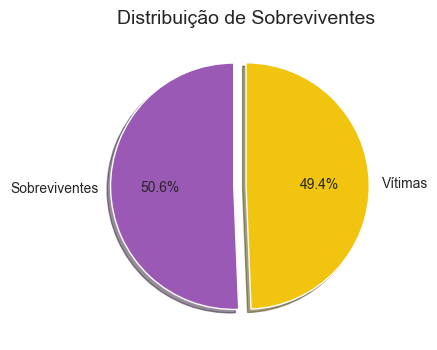

In [1136]:
total_true = df['Sobrevivente'].sum()
total_false = len(df['Sobrevivente']) - total_true

labels = ['Sobreviventes', 'Vítimas']
sizes = [total_true, total_false]
colors = ['#9B59B6', '#F1C40F']
explode = (0.1, 0)

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True)

plt.title('Distribuição de Sobreviventes', fontsize=14)
plt.show()

## Análise de Passageiros em Família e Solo
Identificar se os passageiros se estão viajando sozinhos ou em grupo (família) com base em um identificador fornecido.

- Separar o ID de Grupo e o Número do Integrante
    - Dividimos o identificador único de cada passageiro (`IDpassageiro`) em duas partes: o grupo ao qual o passageiro pertence e o número de cada integrante dentro desse grupo. Isso nos permite rastrear quantos passageiros fazem parte de cada grupo.

- Identificar se o Passageiro está em Família
    - Com a contagem de passageiros por grupo, criou-se uma nova coluna ("EmGrupo") para os passageiros que pertencem a grupos com mais de um integrante
    - É possível ver que mais de 59% dos passageiros estão sozinhos, e quase 41% estão em Grupo ou Família.


In [1137]:
df[['Grupo', 'Integrante']] = df['IDpassageiro'].str.split('_', expand=True)
group_counts = df['Grupo'].value_counts()
df['EmGrupo'] = df['Grupo'].apply(lambda x: 1 if group_counts[x] > 1 else 0)

print(df.EmGrupo.value_counts())

EmGrupo
0    4240
1    2884
Name: count, dtype: int64


#### Visualização dos Tamanhos dos Grupos
- Criar um dataframe para contar os tamanhos dos grupos, levando em conta apenas aqueles "grupos" com mais de 1 integrante.
- Exibir em um gráfico de Tamanho dos grupos e Quantidade de Grupos

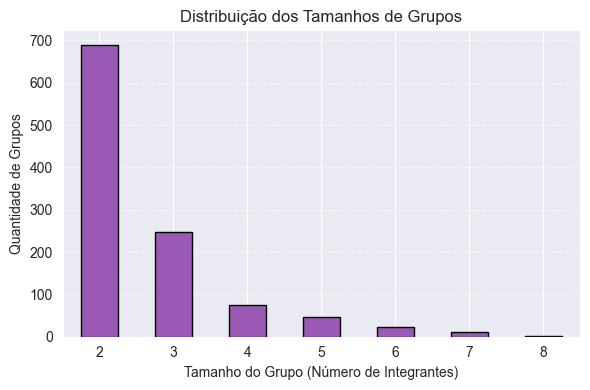

In [1138]:
group_size_counts = group_counts.value_counts().sort_index()
filtered_group_size_counts = group_size_counts[group_size_counts.index > 1]

plt.figure(figsize=(6, 4))
filtered_group_size_counts.plot(kind='bar', color='#9B59B6', edgecolor='black')

plt.title('Distribuição dos Tamanhos de Grupos')
plt.xlabel('Tamanho do Grupo (Número de Integrantes)')
plt.ylabel('Quantidade de Grupos')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Visualizar a Distribuição de Passageiros por Deck
Mostrando visualmente a quantidade de passageiros em cada Deck do navio.

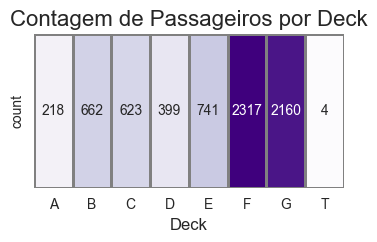

In [1139]:
deck_counts = df['Deck'].value_counts().reset_index()
deck_counts_sorted = deck_counts.sort_values(by='Deck', ascending=True)
deck_counts.columns = ['Deck', 'Contagem']

plt.figure(figsize=(4, 2))
sns.heatmap(deck_counts_sorted.set_index('Deck').T, annot=True, fmt='d', cmap='Purples', cbar=False, linewidths=1, linecolor='gray')

plt.title('Contagem de Passageiros por Deck', fontsize=16)
plt.xlabel('Deck', fontsize=12)
plt.show()

### Visualizar a Distribuição de Passageiros por Deck e Posição da Cabine
Mostrando visualmente a proporção de sobreviventes em cada Cabine e Deck do navio.

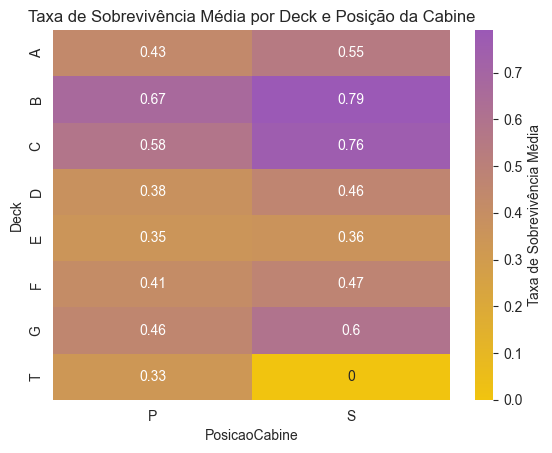

In [1140]:
pivot_table = df.pivot_table(values="Sobrevivente", index="Deck", columns="PosicaoCabine", aggfunc="mean")
colors = ['#F1C40F', '#9B59B6']
cmap = LinearSegmentedColormap.from_list("purple_yellow", colors)
sns.heatmap(pivot_table, annot=True, cmap=cmap, cbar_kws={'label': 'Taxa de Sobrevivência Média'})
plt.title("Taxa de Sobrevivência Média por Deck e Posição da Cabine")
plt.show()

### Análise das Faixas Etárias e Taxa de Sobrevivência:
- **Criação de novas colunas**
   - `GrupoHetario` foi criado para agrupar idade em faixas.

In [1141]:
df['GrupoHetario'] = pd.cut(df['Idade'], bins=[-1, 17, 35, 59, 100], labels=["Crianças", "Jovens", "Adultos", "Idosos"])
# df['GrupoHetarioCode'] = df['GrupoHetario'].cat.codes

#### Calcula a média da taxa de sobrevivência para cada grupo etário presente no conjunto de dados.

- **Distribuição de Sobreviventes por Faixa Etária:**
  - Cria um histograma empilhado para visualizar a distribuição de sobreviventes e não sobreviventes por faixa etária.
  - Adota a paleta 'Set2' para diferenciação de cores entre grupos.
  - Ajusta a largura das barras para melhorar a apresentação visual dos dados.


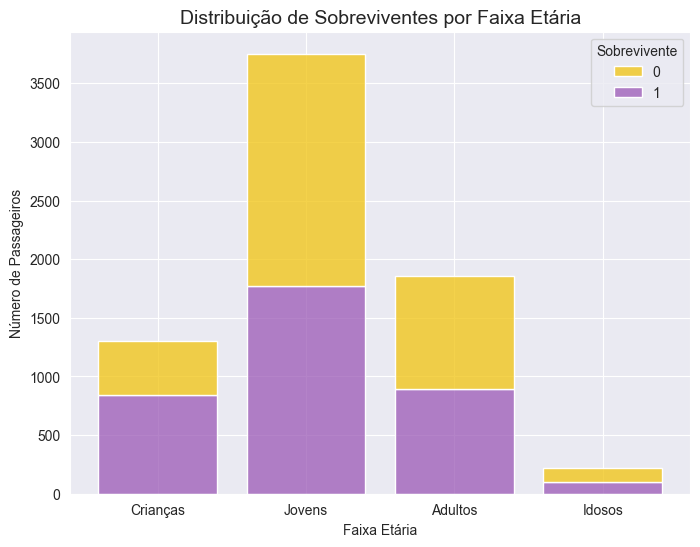

  Faixa Etária  Taxa de Sobrevivência
0     Crianças               0.645385
1       Jovens               0.472422
2      Adultos               0.481402
3       Idosos               0.476852


In [1142]:
survival_by_age_group = df.groupby('GrupoHetario', observed=False)['Sobrevivente'].mean()

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='GrupoHetario', hue='Sobrevivente', multiple='stack', palette=colors, shrink=0.8)
plt.title('Distribuição de Sobreviventes por Faixa Etária', fontsize=14)
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Passageiros')
plt.show()

survival_table = survival_by_age_group.reset_index()
survival_table.columns = ['Faixa Etária', 'Taxa de Sobrevivência']
print(survival_table)

### 2️⃣ Transformação e Pré-processamento de dados
---
- **Cálculo do Total Gasto:**
  - Cria uma nova coluna chamada 'TotalGasto', que é a soma das colunas relacionadas a serviços consumidos pelos passageiros: 'ServicoCabine', 'Restaurante', 'Shopping', 'SPA', e 'ParquedeAguas'.

- **Codificação de Variáveis Categóricas:**
  - Utiliza o `OrdinalEncoder` para transformar variáveis categóricas em valores numéricos, aplicando a codificação para todas as colunas do tipo `object`.
  - Especifica uma ordem predefinida de categorias para a coluna 'GrupoHetario' ('Crianças', 'Jovens', 'Adultos', 'Idosos') e realiza a transformação.

- **Exclusão de Colunas Irrelevantes:**
  - Remove colunas que não são necessárias para a análise ou modelagem, como informações de identificação e outros atributos irrelevantes, incluindo 'IDpassageiro', 'Nome', 'Procedencia', 'Destino', etc.

- **Resultado Final:**
  - O DataFrame resultante contém apenas as colunas numéricas e as variáveis codificadas, prontas para análise ou modelagem.


In [1143]:
df['TotalGasto'] = df[['ServicoCabine', 'Restaurante', 'Shopping', 'SPA', 'ParquedeAguas']].sum(axis=1)


ordinal_encoder = OrdinalEncoder()
df[df.select_dtypes(include=['object']).columns] = ordinal_encoder.fit_transform(
    df.select_dtypes(include=['object'])
)
# encoder = OrdinalEncoder(categories=[['Crianças', 'Jovens', 'Adultos', 'Idosos']])
# df['GrupoHetario'] = encoder.fit_transform(df[['GrupoHetario']])



df.drop(['ServicoCabine', 'Restaurante', 'Shopping', 'SPA', 'ParquedeAguas', 'IDpassageiro', 'Nome', 'NumeroCabine', 'Grupo', 'Integrante', 'GrupoHetario'], axis=1, inplace=True)

df

,Deck,PosicaoCabine,Procedencia,Destino,Idade,VIP,AllInclusive,Sobrevivente,EmGrupo,TotalGasto
0,2.0,0.0,1.0,2.0,52.0,0,0,1,1,2776.0
1,3.0,1.0,0.0,0.0,21.0,0,0,0,0,1765.0
2,4.0,1.0,2.0,0.0,27.0,0,0,0,0,791.0
3,4.0,1.0,1.0,0.0,28.0,0,1,1,1,0.0
4,1.0,0.0,1.0,2.0,29.0,0,0,0,1,17623.0
...,...,...,...,...,...,...,...,...,...,...
7119,5.0,0.0,0.0,0.0,47.0,0,0,0,0,1574.0
7120,5.0,0.0,2.0,0.0,24.0,0,0,0,0,804.0
7121,3.0,0.0,0.0,3.0,18.0,0,0,0,0,917.0
7122,5.0,0.0,0.0,2.0,19.0,0,0,0,0,1986.0


#### Análise de Correlação
  - Utiliza o método `.corr()` para calcular a matriz de correlação entre todas as colunas numéricas do DataFrame.

- **Exibição das Correlações com a Coluna 'Sobrevivente':**
  - A análise ajuda a entender quais variáveis têm maior correlação com a taxa de sobrevivência, facilitando a seleção de features para modelos preditivos.


In [1144]:
correlation_matrix = df.corr()
print(correlation_matrix['Sobrevivente'].sort_values(ascending=False))

Sobrevivente     1.000000
AllInclusive     0.462834
EmGrupo          0.107750
PosicaoCabine    0.104908
Destino          0.098895
VIP             -0.033461
Idade           -0.083369
Procedencia     -0.108649
Deck            -0.109646
TotalGasto      -0.199228
Name: Sobrevivente, dtype: float64


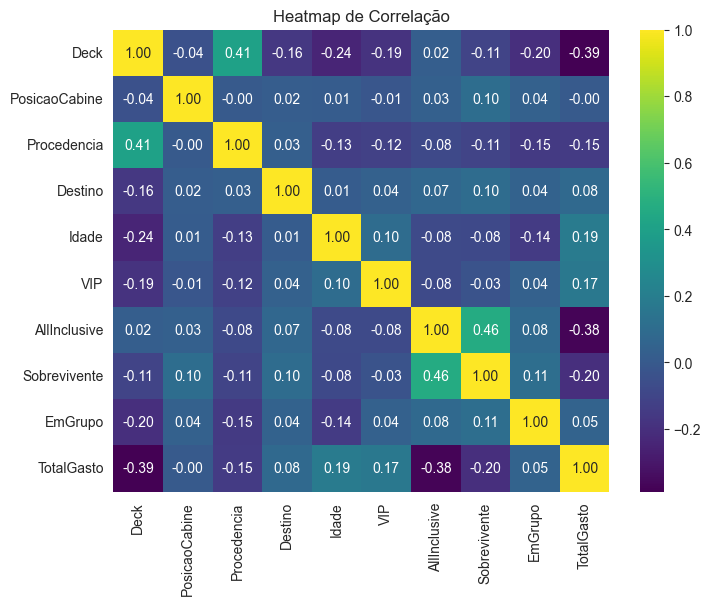

In [1145]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="viridis",
    cbar=True
)
plt.title("Heatmap de Correlação")
plt.show()


#### Separando os atributos do conjunto de dados em variáveis independentes (X) e a variável dependente (y).
- As variáveis independentes são todas as colunas do DataFrame, exceto 'Sobrevivente', que é removida.
- A variável dependente 'Sobrevivente' é isolada em y.

#### Dividir os dados em conjuntos de treinamento e teste

In [1146]:
X = df.drop(["Sobrevivente"], axis=1)
y = df["Sobrevivente"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modelo 1: KNN

- **Configuração:** Testa diferentes valores de `n_vizinhos` (1 a 15) e usa validação cruzada com 10 divisões (`k_splits`).
- **Busca de Parâmetros:** Utiliza `GridSearchCV` para explorar combinações de `n_neighbors` e `weights` (uniforme ou distância).
- **Resultados:** Exibe a melhor configuração de parâmetros (número de vizinhos e peso) com a maior acurácia média.

Objetivo: Encontrar a melhor configuração do modelo KNN baseada na acurácia e desempenho com diferentes parâmetros.

In [1147]:
n_vizinhos = [1, 3, 5, 7, 9, 11, 13, 14, 15]
k_splits = 10

parametros = { 'n_neighbors': n_vizinhos, 'weights':['uniform', 'distance']}
modelo = KNeighborsClassifier()
valcruz = GridSearchCV(modelo, parametros,cv=k_splits)
valcruz.fit(X_train, y_train)
resultados = pd.DataFrame(valcruz.cv_results_).sort_values(by='rank_test_score')

print('Melhor resultado - Número vizinhos:{}   Pesos:{}    Acurácia média:{:.3f}'.format(
    resultados['param_n_neighbors'].iloc[0],
    resultados['param_weights'].iloc[0],
    resultados['mean_test_score'].iloc[0]))

Melhor resultado - Número vizinhos:14   Pesos:uniform    Acurácia média:0.732


#### Protocolo Experimental com Preparação e Modelagem

- **Configuração do Pipeline:**
  - Cria um pipeline com reescalonamento dos dados usando `MinMaxScaler` e aplica o modelo KNN para classificação.
  - O reescalonamento também pode ser feito com `StandardScaler`.

- **Busca de Parâmetros com GridSearchCV:**
  - Testa diferentes valores de `n_neighbors` e `weights` com validação cruzada (`KFold` com 10 divisões).
  - Aplica `GridSearchCV` para encontrar a melhor combinação de parâmetros.

- **Exibição dos Resultados:**
  - Exibe o melhor valor de `k` e a acurácia com a combinação ideal de parâmetros.

Objetivo: Avaliar o desempenho do modelo KNN com diferentes parâmetros e encontrar a melhor configuração utilizando validação cruzada.

In [1148]:
modelo = Pipeline(steps=[
    ('reescala', MinMaxScaler()),
     ('modelagem', KNeighborsClassifier())
    ])

parametros = {'modelagem__n_neighbors':n_vizinhos, 'modelagem__weights':['uniform', 'distance']}
kfold = KFold(n_splits=k_splits, shuffle=True, random_state=0)
grade = GridSearchCV(modelo, param_grid=parametros, cv=kfold)
grade.fit(X_train,y_train)

print('Melhor k:{}  score:{:0.3f}'.format(grade.best_params_, grade.best_score_))

Melhor k:{'modelagem__n_neighbors': 14, 'modelagem__weights': 'uniform'}  score:0.721


#### Captura da Melhor Configuração e Avaliação do Modelo

- **Captura da Melhor Configuração:**
  - Recupera os melhores parâmetros de `n_neighbors` e `weights` do `GridSearchCV` e utiliza o `MinMaxScaler` para reescalonar os dados de treino e teste.

- **Treinamento e Predição:**
  - Treina o modelo KNN com os melhores parâmetros e realiza previsões no conjunto de teste escalonado.

- **Métricas:** São calculadas a acurácia, precisão, revocação (recall), F1-score e a matriz de confusão.

- **Exibição dos Resultados**

Objetivo: Avaliar o desempenho do modelo KNN com os melhores parâmetros usando acurácia e matriz de confusão.

Acurácia no conjunto de treino: 75.17%
Acurácia no conjunto de teste: 72.64%
Acurácia geral (teste): 0.73
Precisão: 0.74
Revocação: 0.73
F1-score: 0.72

Matriz de Confusão:
k= 14   Acuracia= 0.7263797942001871


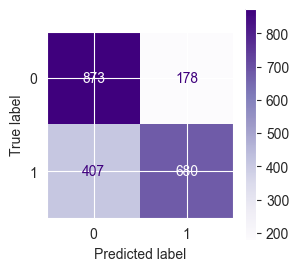

In [1149]:
n_neighbors_best = grade.best_params_['modelagem__n_neighbors']
n_weights_best = grade.best_params_['modelagem__weights']

escalonador = MinMaxScaler()
modelo = KNeighborsClassifier(n_neighbors=n_neighbors_best, weights=n_weights_best)

treino_X_escalonado = escalonador.fit_transform(X_train, y_train)
teste_X_escalonado = escalonador.transform(X_test)
modelo.fit(treino_X_escalonado, y_train)
teste_pred_y = modelo.predict(teste_X_escalonado)

acuracia = accuracy_score(y_test, teste_pred_y)
resultado = confusion_matrix(y_test, teste_pred_y)

treino_pred_y = modelo.predict(treino_X_escalonado)
teste_pred_y = modelo.predict(teste_X_escalonado)

acuracia_treino = accuracy_score(y_train, treino_pred_y)
acuracia_teste = accuracy_score(y_test, teste_pred_y)
precision = precision_score(y_test, teste_pred_y, average='weighted')
recall = recall_score(y_test, teste_pred_y, average='weighted')
f1 = f1_score(y_test, teste_pred_y, average='weighted')

# Exibindo os resultados
print(f"Acurácia no conjunto de treino: {acuracia_treino * 100:.2f}%")
print(f"Acurácia no conjunto de teste: {acuracia_teste * 100:.2f}%")
print(f"Acurácia geral (teste): {acuracia_teste:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Revocação: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print("\nMatriz de Confusão:")

confusion_matrix_display = ConfusionMatrixDisplay(resultado)
confusion_matrix_display.plot(cmap="Purples")
fig = confusion_matrix_display.figure_
fig.set_figheight(3)
fig.set_figwidth(3)

print('k=', n_neighbors_best,'  Acuracia=', acuracia)

## Modelo 2: XGBoost com RandomizedSearchCV

- **Definição do Modelo:** Utiliza o `XGBClassifier` com `random_state=42` para reprodutibilidade.

- **Busca de Hiperparâmetros:** Aplica o `RandomizedSearchCV` para otimizar os parâmetros do modelo, com 50 tentativas (`n_iter=50`) e validação cruzada de 3 divisões (`cv=3`).

- **Treinamento e Resultados:** Treina o modelo com os melhores parâmetros encontrados, exibe a acurácia obtida e avalia o desempenho no conjunto de teste.

**Objetivo:** Otimizar e avaliar o desempenho do modelo XGBoost com os melhores parâmetros encontrados via RandomizedSearchCV.

In [1150]:
xgboost_model = XGBClassifier(random_state=42)
param_dist = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1]
}

random_search = RandomizedSearchCV(estimator=xgboost_model, param_distributions=param_dist,
                                   n_iter=50, scoring='accuracy', cv=3, verbose=1, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

print("Melhores parâmetros encontrados:")
print(random_search.best_params_)
print("Melhor acurácia:", random_search.best_score_)

best_model = random_search.best_estimator_
acc_test_best_model = best_model.score(X_test, y_test)

print(f"Acurácia no conjunto de teste com o melhor modelo: {acc_test_best_model * 100:.2f}%")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Melhores parâmetros encontrados:
{'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}
Melhor acurácia: 0.7470918572001605
Acurácia no conjunto de teste com o melhor modelo: 74.51%


#### Modelo XGBoost com Avaliação de Desempenho

- **Treinamento:** O modelo `XGBClassifier` é configurado com parâmetros específicos e treinado nos dados de treinamento (`X_train`, `y_train`).

- **Avaliação:** A acurácia é calculada tanto no conjunto de treino quanto no conjunto de teste, e as previsões são feitas para comparar com os valores reais.

- **Métricas:** São calculadas a acurácia, precisão, revocação (recall), F1-score e a matriz de confusão.

- **Resultados:** Exibição das métricas calculadas e da matriz de confusão para análise do desempenho do modelo.


Acurácia no conjunto de treino: 79.16%
Acurácia no conjunto de teste: 74.51%
Acurácia geral (teste): 0.75
Precisão: 0.80
Revocação: 0.66
F1-score: 0.73

Matriz de Confusão:


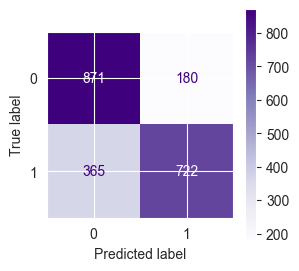

In [1151]:
xgboost_model = XGBClassifier(gamma= 0, colsample_bytree= 0.8, max_depth=7,
                              learning_rate=0.05, n_estimators=100, random_state=42,
                              reg_alpha=1, reg_lambda=1, subsample= 0.8)
xgboost_model.fit(X_train, y_train)

acc_xgboost_train = round(xgboost_model.score(X_train, y_train) * 100, 2)
acc_xgboost_test = round(xgboost_model.score(X_test, y_test) * 100, 2)

y_pred = xgboost_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibindo os resultados
print(f"Acurácia no conjunto de treino: {acc_xgboost_train}%")
print(f"Acurácia no conjunto de teste: {acc_xgboost_test}%")
print(f"Acurácia geral (teste): {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Revocação: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

print("\nMatriz de Confusão:")
confusion_matrix_display = ConfusionMatrixDisplay(conf_matrix)
confusion_matrix_display.plot(cmap="Purples")
fig = confusion_matrix_display.figure_
fig.set_figheight(3)
fig.set_figwidth(3)

Decision Tree

### Resumo: Indução do Modelo Decision Tree com Validação Cruzada

**Configuração de Pipeline:**
   - **Reescala:** `MinMaxScaler` normaliza os dados.
   - **Modelo:** `DecisionTreeClassifier` com `random_state=0`.

2. **Avaliação de Hiperparâmetros:**
   - `ccp_alpha`: Regularização para poda.
   - `max_leaf_nodes`: Número máximo de folhas.
   - `criterion`: Critério de divisão (`gini` ou `entropy`).
   - `feature_range`: Intervalo de reescalonamento.

3. **Validação Cruzada:**
   - `StratifiedKFold` com 10 divisões e embaralhamento.
   - Busca de melhor combinação via `GridSearchCV`.

4. **Treinamento:**
   - Ajusta os dados ao pipeline e avalia diferentes combinações.

**Melhores Parâmetros Encontrados:**


In [1152]:
# indução do modelo para diferentes valores para os parâmetros, com validação cruzada
ccp_alphas = [0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.04, 0.05, 0.055, 0.06, 0.07, 0.08, 0.09, 0.1]
max_leafs = [2, 3, 4, 5, 6, 7, 8, 9]#, 10, 11, 13, 15, 17, 21]

k_splits = 10

modelo = Pipeline(steps=[('reescala', MinMaxScaler()),
    ('modelo', DecisionTreeClassifier(random_state=0))])

parametros = {'reescala__feature_range':[(0,1)],
              'modelo__ccp_alpha': ccp_alphas,
              'modelo__max_leaf_nodes':max_leafs,
              'modelo__criterion':['gini','entropy']}

skfold = StratifiedKFold(n_splits=k_splits, shuffle=True, random_state=0)

valcruz = GridSearchCV(modelo, parametros,cv=skfold)

valcruz.fit(X_train, y_train)

resultados = pd.DataFrame(valcruz.cv_results_).sort_values(by='rank_test_score')
melhor_feature_range = resultados['param_reescala__feature_range'].iloc[0]
melhor_criterion = resultados['param_modelo__criterion'].iloc[0]
melhor_max_leaf_nodes = resultados['param_modelo__max_leaf_nodes'].iloc[0]
melhor_ccp_alpha = resultados['param_modelo__ccp_alpha'].iloc[0]

resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modelo__ccp_alpha,param_modelo__criterion,param_modelo__max_leaf_nodes,param_reescala__feature_range,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
15,0.003996,0.003996,0.002403,0.003671,0.0,entropy,9,"(0, 1)","{'modelo__ccp_alpha': 0.0, 'modelo__criterion'...",0.747495,...,0.737475,0.737475,0.769539,0.726908,0.736948,0.753012,0.73494,0.741674,0.012152,1
0,0.004806,0.003924,0.000800,0.002401,0.0,gini,2,"(0, 1)","{'modelo__ccp_alpha': 0.0, 'modelo__criterion'...",0.747495,...,0.733467,0.735471,0.769539,0.726908,0.736948,0.753012,0.73494,0.741073,0.012424,2
2,0.007829,0.002170,0.000801,0.002402,0.0,gini,4,"(0, 1)","{'modelo__ccp_alpha': 0.0, 'modelo__criterion'...",0.747495,...,0.733467,0.735471,0.769539,0.726908,0.736948,0.753012,0.73494,0.741073,0.012424,2
1,0.007546,0.001513,0.000799,0.002397,0.0,gini,3,"(0, 1)","{'modelo__ccp_alpha': 0.0, 'modelo__criterion'...",0.747495,...,0.733467,0.735471,0.769539,0.726908,0.736948,0.753012,0.73494,0.741073,0.012424,2
4,0.007455,0.001644,0.002154,0.003353,0.0,gini,6,"(0, 1)","{'modelo__ccp_alpha': 0.0, 'modelo__criterion'...",0.747495,...,0.733467,0.735471,0.769539,0.726908,0.736948,0.753012,0.73494,0.741073,0.012424,2


In [1153]:
# listar os melhores resultados para os parâmetros

print('Melhor preparação - Feature Range:{}'.format(melhor_feature_range))
print('Melhor resultado - Critério:{}   Máximo número de nodos folha:{}   Alfa:{}    Acurácia média:{:.3f}'.format(
    melhor_criterion,
    melhor_max_leaf_nodes,
    melhor_ccp_alpha,
    resultados['mean_test_score'].iloc[0]))


Melhor preparação - Feature Range:(0, 1)
Melhor resultado - Critério:entropy   Máximo número de nodos folha:9   Alfa:0.0    Acurácia média:0.742


[[849 202]
 [379 708]]
Acuracia=0.728


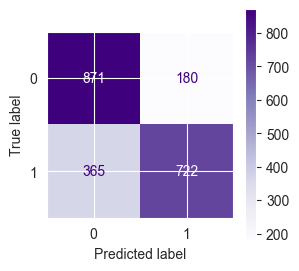

In [1154]:
escalonador = MinMaxScaler(feature_range = melhor_feature_range)
estimador = DecisionTreeClassifier(ccp_alpha = melhor_ccp_alpha,
                                   max_leaf_nodes = melhor_max_leaf_nodes,
                                   criterion = melhor_criterion)

treino_X_escalonado = escalonador.fit_transform(X_train, y_train)
estimador.fit(treino_X_escalonado, y_train)
teste_X_escalonado = escalonador.transform(X_test)
teste_pred_y = estimador.predict(teste_X_escalonado)
acuracia = accuracy_score(y_test, teste_pred_y)
resultado = confusion_matrix(y_test, teste_pred_y)
cm_display = ConfusionMatrixDisplay(resultado)
print(resultado)
confusion_matrix_display.plot(cmap="Purples")
fig = confusion_matrix_display.figure_
fig.set_figheight(3)
fig.set_figwidth(3)
print('Acuracia={:.3f}'.format(acuracia))

In [1155]:
# apresentações do modelo
modelo_txt = export_text(estimador, feature_names=list(X.columns))
print(modelo_txt)

|--- TotalGasto <= 0.00
|   |--- Procedencia <= 0.50
|   |   |--- AllInclusive <= 0.50
|   |   |   |--- Idade <= 0.16
|   |   |   |   |--- class: 1
|   |   |   |--- Idade >  0.16
|   |   |   |   |--- class: 1
|   |   |--- AllInclusive >  0.50
|   |   |   |--- Procedencia <= 0.17
|   |   |   |   |--- Deck <= 0.64
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Deck >  0.64
|   |   |   |   |   |--- class: 1
|   |   |   |--- Procedencia >  0.17
|   |   |   |   |--- Idade <= 0.04
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Idade >  0.04
|   |   |   |   |   |--- class: 1
|   |--- Procedencia >  0.50
|   |   |--- class: 1
|--- TotalGasto >  0.00
|   |--- Deck <= 0.36
|   |   |--- class: 0
|   |--- Deck >  0.36
|   |   |--- class: 0



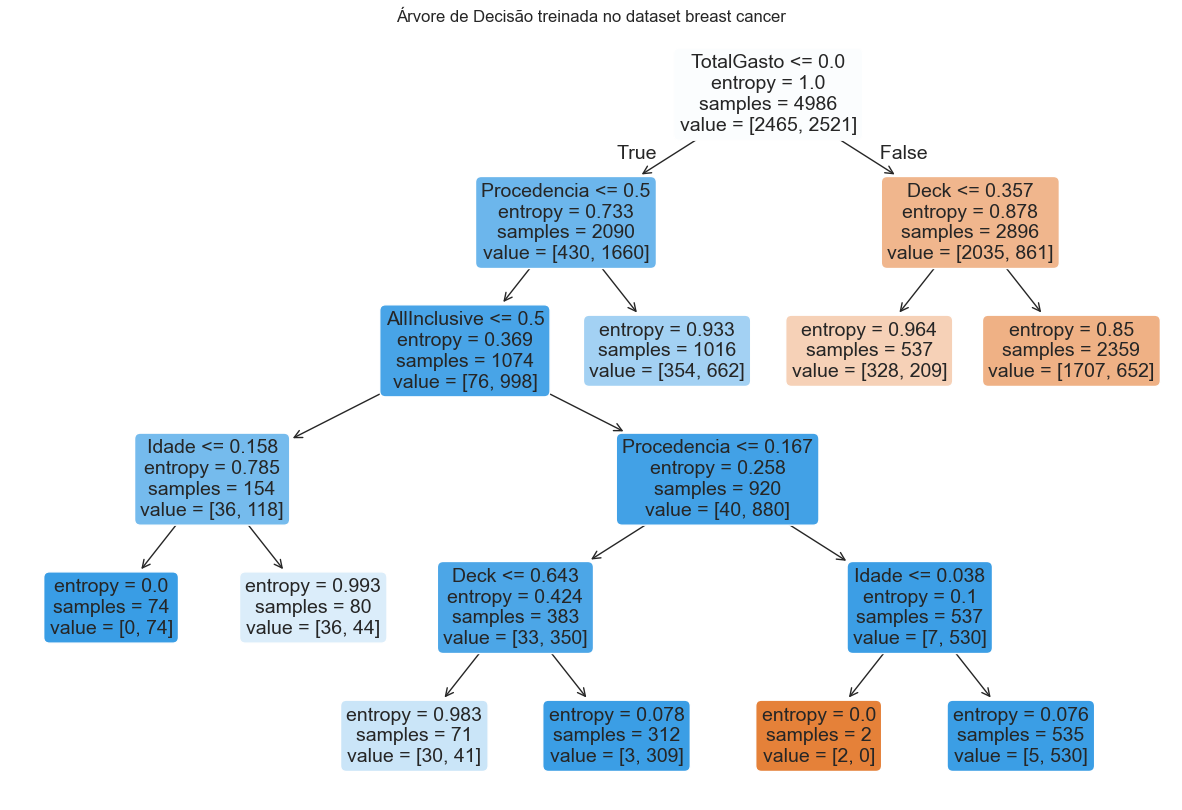

In [1156]:
# apresentações do modelo
plt.figure(figsize=(15, 10))
plot_tree(estimador, filled=True, rounded=True,
          feature_names=list(X.columns))
          # class_names=list(y.columns))
plt.title('Árvore de Decisão treinada no dataset breast cancer')
plt.show()